In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('cars.xls')

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [4]:
x=df[['Price','Mileage','Cylinder']]

In [5]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [7]:
model=KMeans(4)

In [8]:
# pip install --upgrade threadpoolctl scikit-learn

In [9]:
model=model.fit(x)

In [10]:
pred=model.predict(x)

In [11]:
x['cluster']=pred

In [12]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,2
1,17542.036083,9135,6,2
2,16218.847862,13196,6,2
3,16336.913140,16342,6,2
4,16339.170324,19832,6,3


In [13]:
silhouette_score(x,pred)

0.4102243047257007

In [14]:
import matplotlib.pyplot as plt

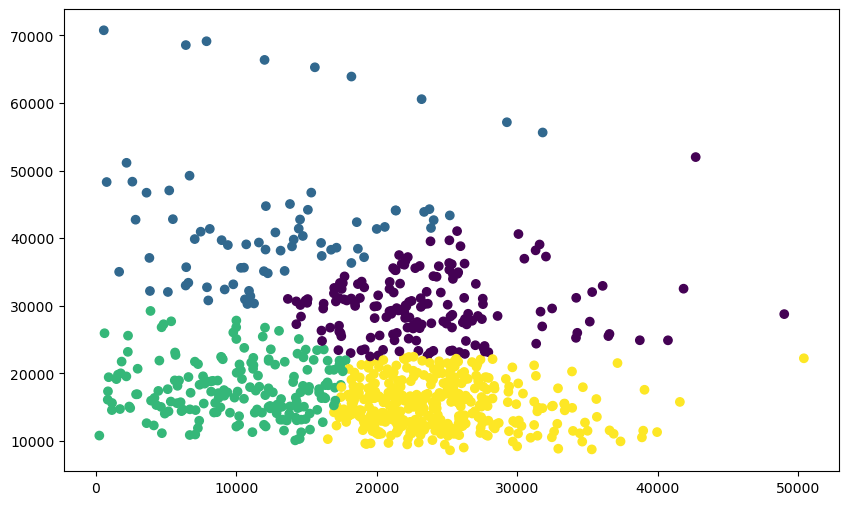

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=pred)

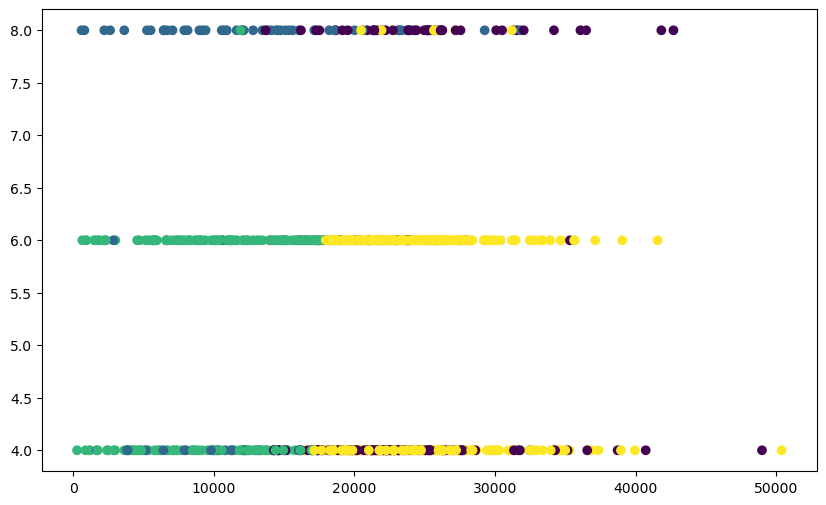

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Cylinder,c=pred)

In [17]:
allscore=[]
allcluster=[]
distances=[]
def clust(k):
    for i in range(1,k):
        i=i+1
        model=KMeans(i)
        model=model.fit(x)
        pred=model.predict(x)
        score=silhouette_score(x,pred) 
        distance=model.inertia_
        print('Cluster: ',i,'score: ',score)
        allscore.append(score)
        allcluster.append(i)
        distances.append(distance)

In [18]:
clust(10)

Cluster:  2 score:  0.45104089380536566
Cluster:  3 score:  0.4132108647829757
Cluster:  4 score:  0.4114527954097564
Cluster:  5 score:  0.35678250982900583
Cluster:  6 score:  0.3522101207565005
Cluster:  7 score:  0.3597125368099713
Cluster:  8 score:  0.3654900661699453
Cluster:  9 score:  0.36417474369273534
Cluster:  10 score:  0.3403381476820432


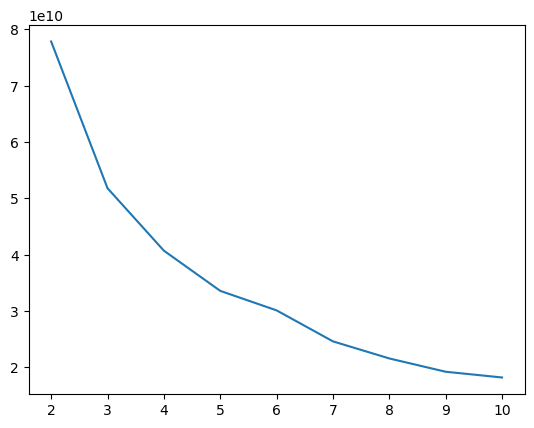

In [19]:
plt.plot(allcluster,distances)

In [20]:
# pip install yellowbrick

In [21]:
from yellowbrick.cluster import KElbowVisualizer

In [22]:
model=KMeans()

In [23]:
visualizer=KElbowVisualizer(model,k=(2,10))

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(2, 10))

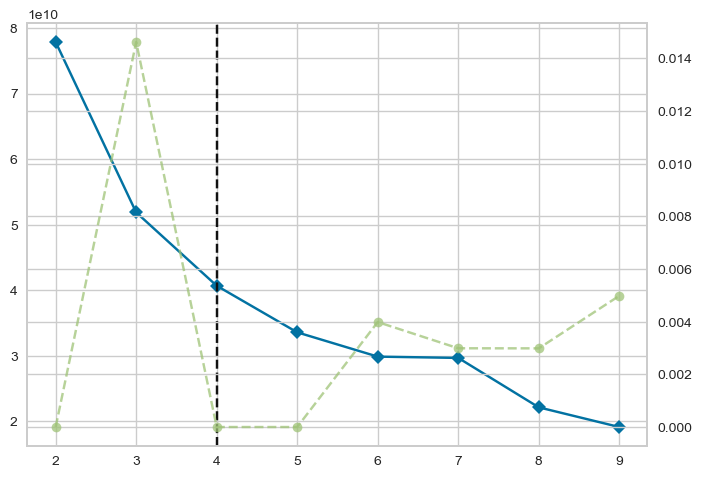

In [24]:
visualizer.fit(x)

In [25]:
visualizer.show()

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [27]:
data=linkage(x,method='ward',metric='euclidean')

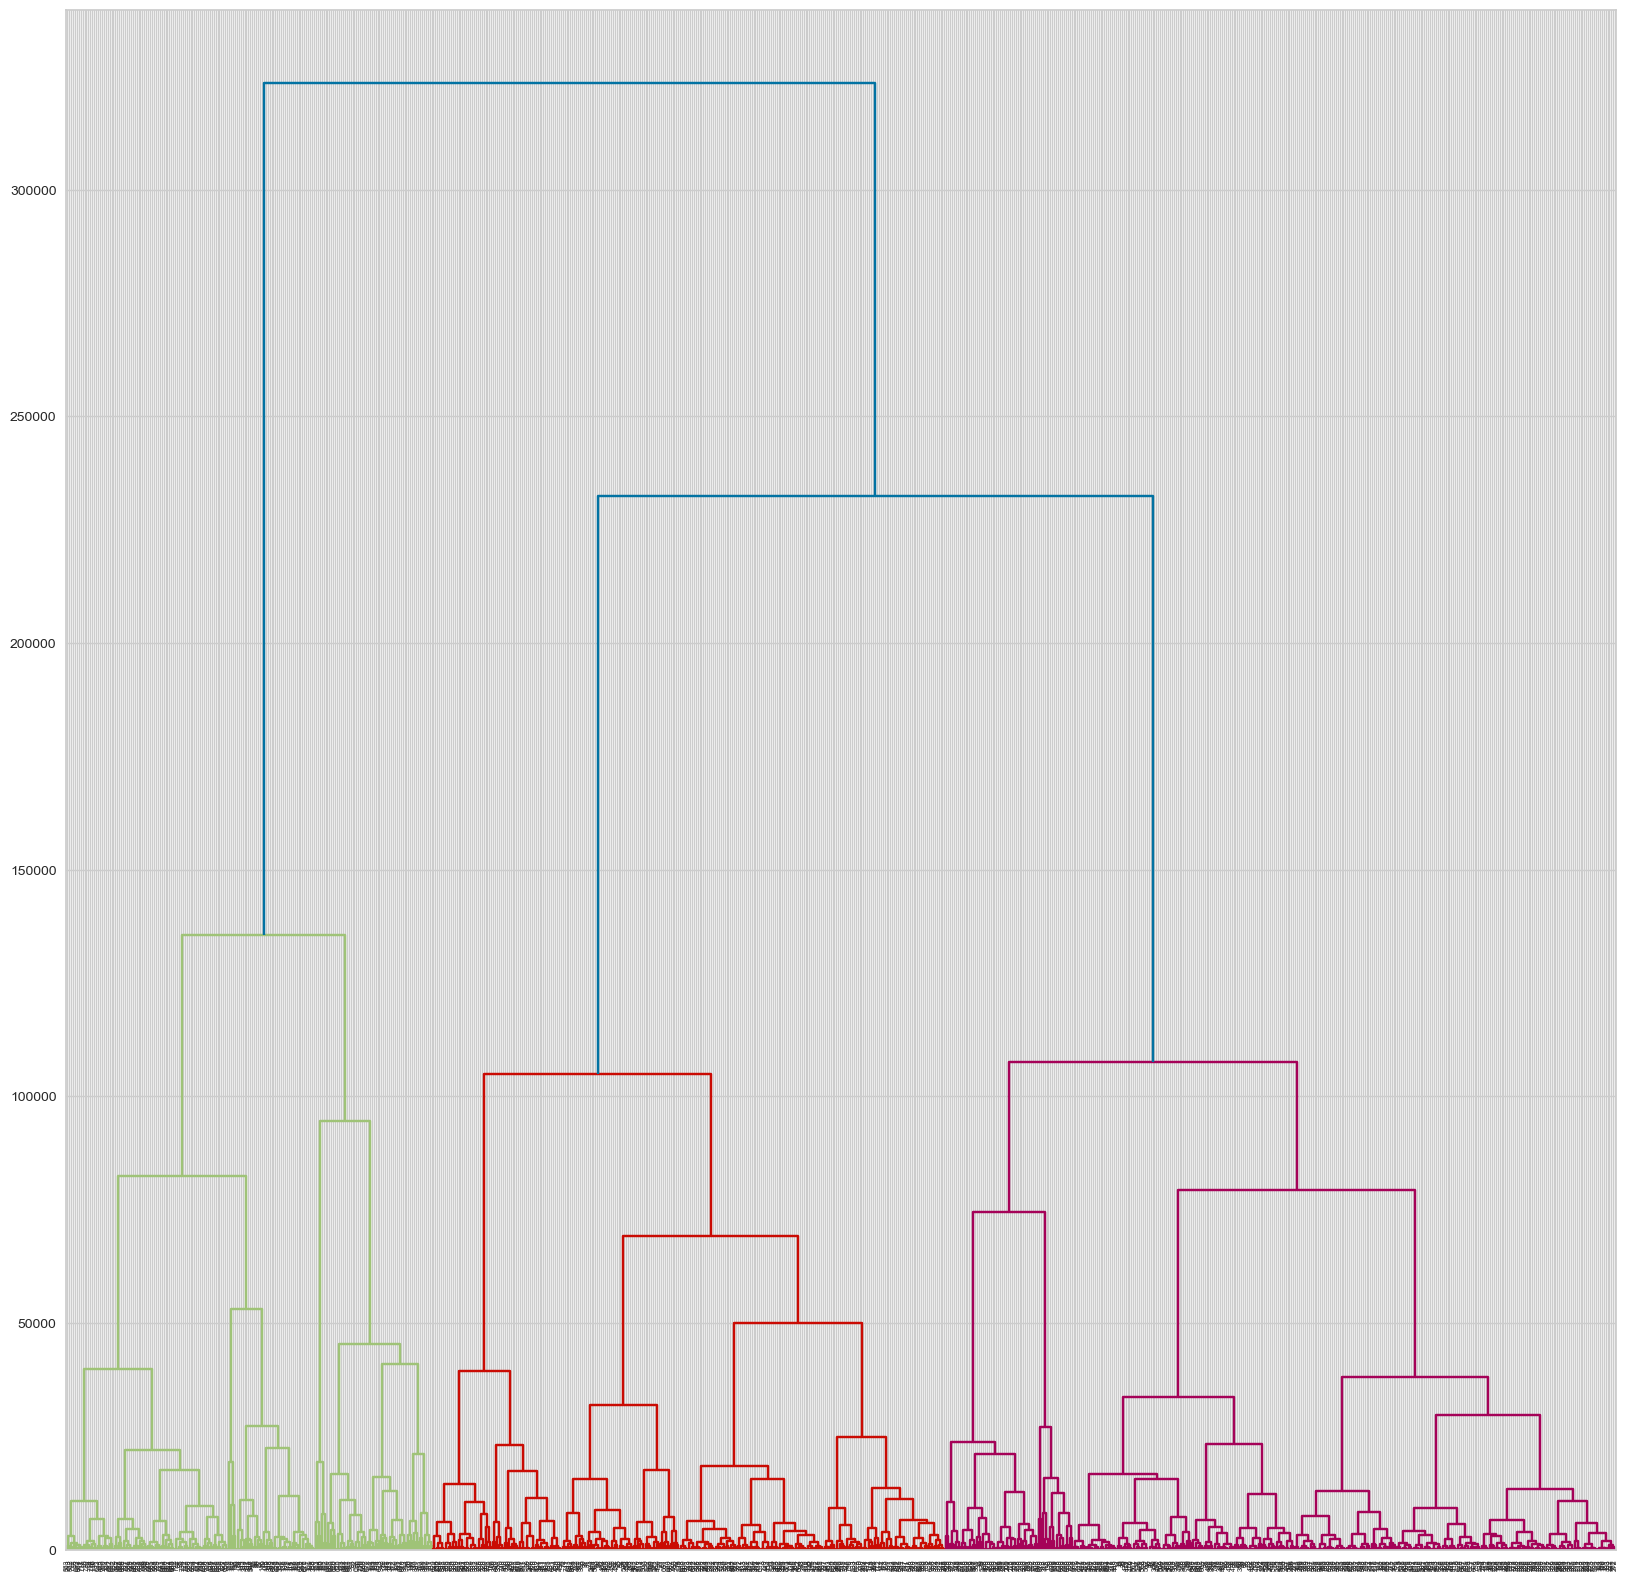

<Figure size 800x550 with 0 Axes>

In [28]:
plt.figure(figsize=(20,20))
dendrogram(data)
plt.show()
plt.savefig('figure1.png')